<a href="https://colab.research.google.com/github/Tanmoy-94/Structural-Dynamics-/blob/main/Wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

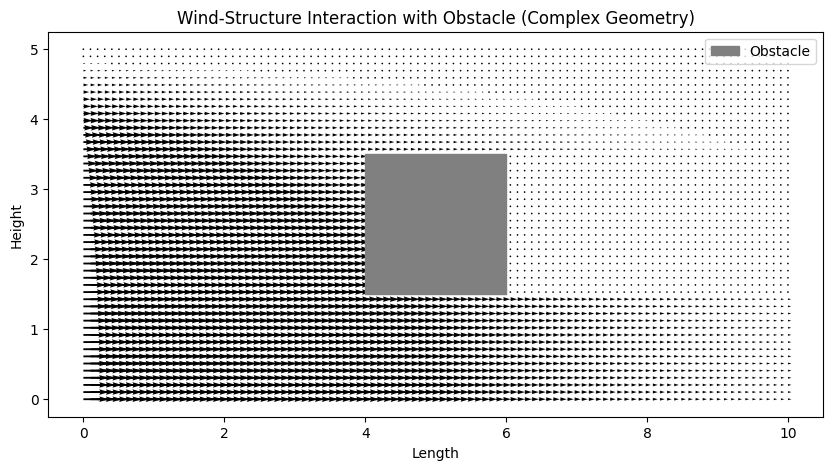

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Geometry parameters
length = 10.0  # Length of the domain
height = 5.0   # Height of the domain
num_x_points = 100    # Number of points along the length
num_y_points = 50     # Number of points along the height

# Obstacle (e.g., building) dimensions and position
obstacle_width = 2.0
obstacle_height = 2.0
obstacle_x_start = 4.0  # Starting position of obstacle along the x-axis
obstacle_x_end = obstacle_x_start + obstacle_width
obstacle_y_start = 1.5  # Starting position along the y-axis
obstacle_y_end = obstacle_y_start + obstacle_height

# Generate the grid points
x = np.linspace(0, length, num_x_points)
y = np.linspace(0, height, num_y_points)
X, Y = np.meshgrid(x, y)

# Define the inflow velocity profile (parabolic profile for simplicity)
def inflow_profile(y, height):
    """Parabolic inflow velocity profile."""
    return 1.0 * (1 - (y / height)**2)  # max_wind_speed is assumed as 1.0 for simplicity

# Create the velocity field
U = np.zeros((num_y_points, num_x_points))  # Velocity in the X direction
V = np.zeros((num_y_points, num_x_points))  # Velocity in the Y direction (zero for now)

# Apply the inflow velocity at the left boundary
for j in range(num_y_points):
    U[j, 0] = inflow_profile(y[j], height)

# Simulate the wind propagation across the domain
for i in range(1, num_x_points):
    for j in range(num_y_points):
        # Check if the point lies within the obstacle region
        if obstacle_x_start <= x[i] <= obstacle_x_end and obstacle_y_start <= y[j] <= obstacle_y_end:
            U[j, i] = 0  # Zero velocity inside the obstacle
        else:
            U[j, i] = U[j, i - 1] * 0.98  # Apply velocity decay as we move rightward

# Visualization using Matplotlib
plt.figure(figsize=(10, 5))

# Plot the velocity field using a quiver plot
plt.quiver(X, Y, U, V)

# Add the obstacle (building) as a filled rectangle
plt.fill_betweenx([obstacle_y_start, obstacle_y_end], obstacle_x_start, obstacle_x_end, color="gray", label="Obstacle")

plt.title('Wind-Structure Interaction with Obstacle (Complex Geometry)')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend()
plt.show()


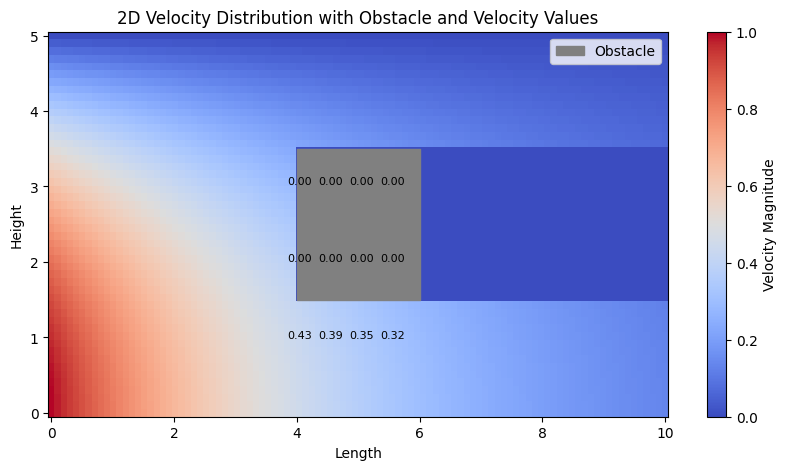

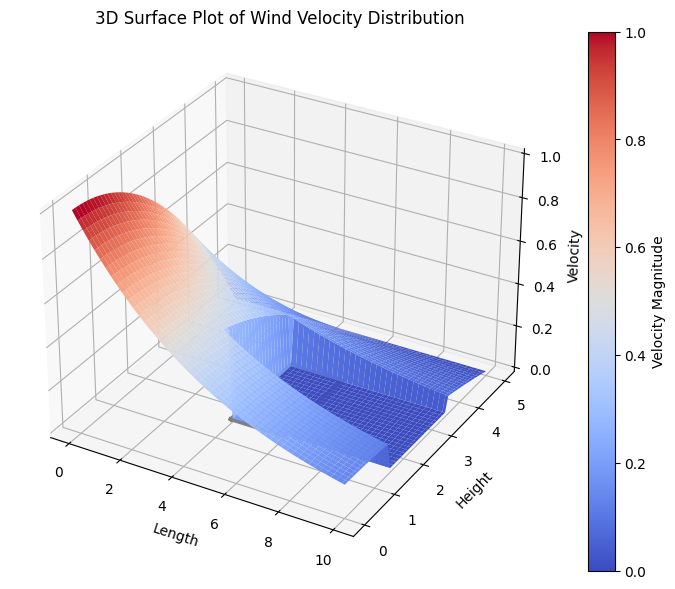

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Geometry parameters
length = 10.0  # Length of the domain
height = 5.0   # Height of the domain
num_x_points = 100    # Number of points along the length
num_y_points = 50     # Number of points along the height

# Obstacle (e.g., building) dimensions and position
obstacle_width = 2.0
obstacle_height = 2.0
obstacle_x_start = 4.0  # Starting position of obstacle along the x-axis
obstacle_x_end = obstacle_x_start + obstacle_width
obstacle_y_start = 1.5  # Starting position along the y-axis
obstacle_y_end = obstacle_y_start + obstacle_height

# Generate the grid points
x = np.linspace(0, length, num_x_points)
y = np.linspace(0, height, num_y_points)
X, Y = np.meshgrid(x, y)

# Define the inflow velocity profile (parabolic profile for simplicity)
def inflow_profile(y, height):
    """Parabolic inflow velocity profile."""
    return 1.0 * (1 - (y / height)**2)  # max_wind_speed is assumed as 1.0 for simplicity

# Create the velocity field
U = np.zeros((num_y_points, num_x_points))  # Velocity in the X direction
V = np.zeros((num_y_points, num_x_points))  # Velocity in the Y direction (zero for now)

# Apply the inflow velocity at the left boundary
for j in range(num_y_points):
    U[j, 0] = inflow_profile(y[j], height)

# Simulate the wind propagation across the domain
for i in range(1, num_x_points):
    for j in range(num_y_points):
        # Check if the point lies within the obstacle region
        if obstacle_x_start <= x[i] <= obstacle_x_end and obstacle_y_start <= y[j] <= obstacle_y_end:
            U[j, i] = 0  # Zero velocity inside the obstacle
        else:
            # Decay velocity as wind propagates rightward
            decay_factor = 0.98
            U[j, i] = U[j, i - 1] * decay_factor

# Create a 2D plot to show velocity values around the obstacle
plt.figure(figsize=(10, 5))
plt.pcolormesh(X, Y, U, shading='auto', cmap='coolwarm')
plt.colorbar(label='Velocity Magnitude')

# Add the obstacle (building) as a filled rectangle
plt.fill_betweenx([obstacle_y_start, obstacle_y_end], obstacle_x_start, obstacle_x_end, color="gray", label="Obstacle")

# Annotate some velocity values around the building (at random grid points around the obstacle)
for i in range(40, 60, 5):  # Picking points around the obstacle
    for j in range(10, 40, 10):
        plt.text(X[j, i], Y[j, i], f"{U[j, i]:.2f}", color="black", fontsize=8, ha='center', va='center')

plt.title('2D Velocity Distribution with Obstacle and Velocity Values')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend()
plt.show()

# 3D Plot to visualize the velocity distribution
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface of the velocity field
ax.plot_surface(X, Y, U, cmap='coolwarm', edgecolor='none')

# Add the obstacle as a flat 3D rectangle in the domain
obstacle_x = [obstacle_x_start, obstacle_x_end, obstacle_x_end, obstacle_x_start, obstacle_x_start]
obstacle_y = [obstacle_y_start, obstacle_y_start, obstacle_y_end, obstacle_y_end, obstacle_y_start]
obstacle_z = [0, 0, 0, 0, 0]  # The obstacle is flat on the surface
ax.plot(obstacle_x, obstacle_y, obstacle_z, color='gray', label="Obstacle", linewidth=3)

# 3D plot settings
ax.set_title('3D Surface Plot of Wind Velocity Distribution')
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Velocity')
ax.view_init(elev=30, azim=-60)  # Adjust the viewing angle for better visibility

# Colorbar for the 3D plot
mappable = plt.cm.ScalarMappable(cmap='coolwarm')
mappable.set_array(U)
fig.colorbar(mappable, ax=ax, label='Velocity Magnitude')

plt.show()
